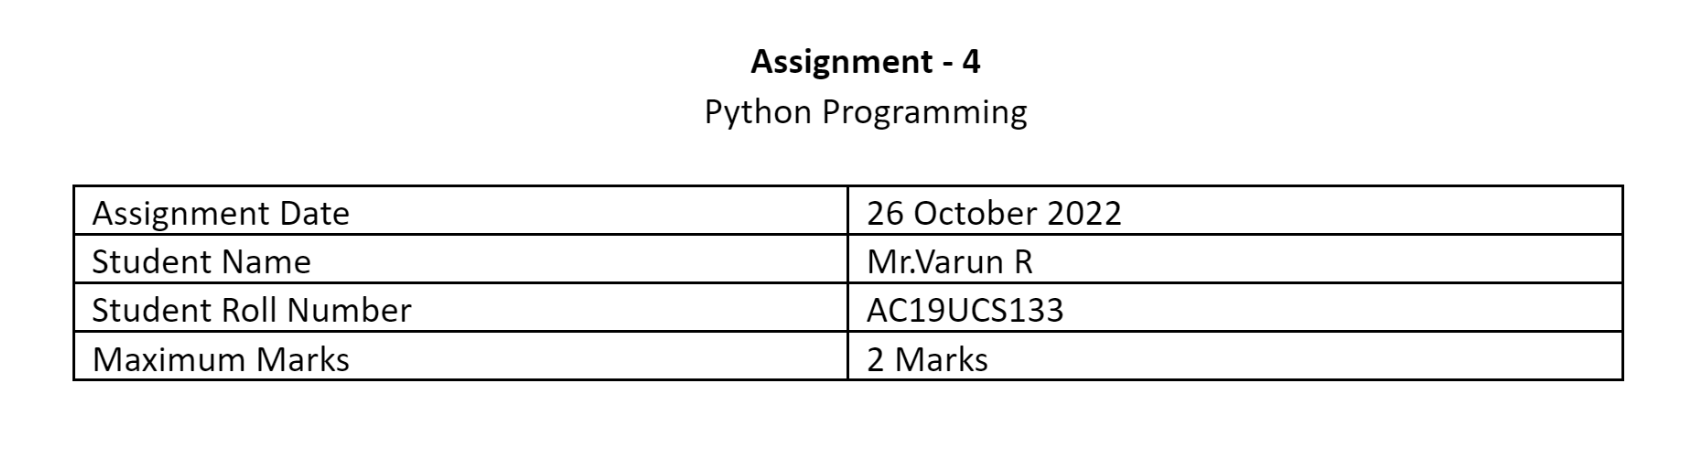

**1.Download the dataset**

**2.Load the dataset**

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [149]:
df=pd.read_csv('Mall_Customers.csv')

In [150]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**3. Perform Visualizations**

univariate analysis

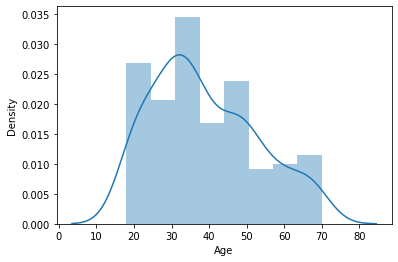

In [151]:
sns.distplot(df['Age'])

Bi-variate analysis

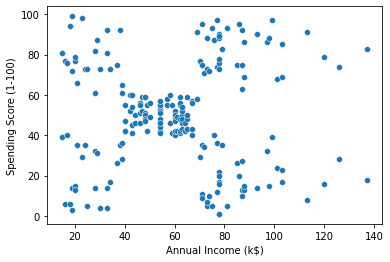

In [152]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

Multivariate analysis

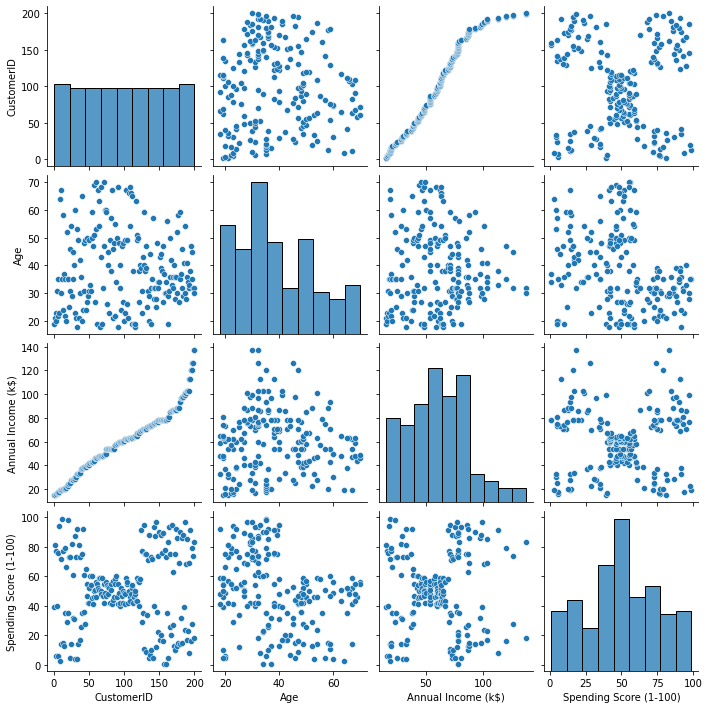

In [153]:
sns.pairplot(df)

**4.Discriptive statistics**

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [155]:
df.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [156]:
df.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [157]:
df.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [158]:
df.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [159]:
df.kurt()

CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [160]:
df.var()

CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [161]:
df.std()

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [162]:
df.max()

CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

In [163]:
df.min()

CustomerID                     1
Gender                    Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)         1
dtype: object

In [164]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**5. Check for Missing values and deal with them.**

In [165]:
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [166]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing value

**6. Find the outliers and replace the outliers**

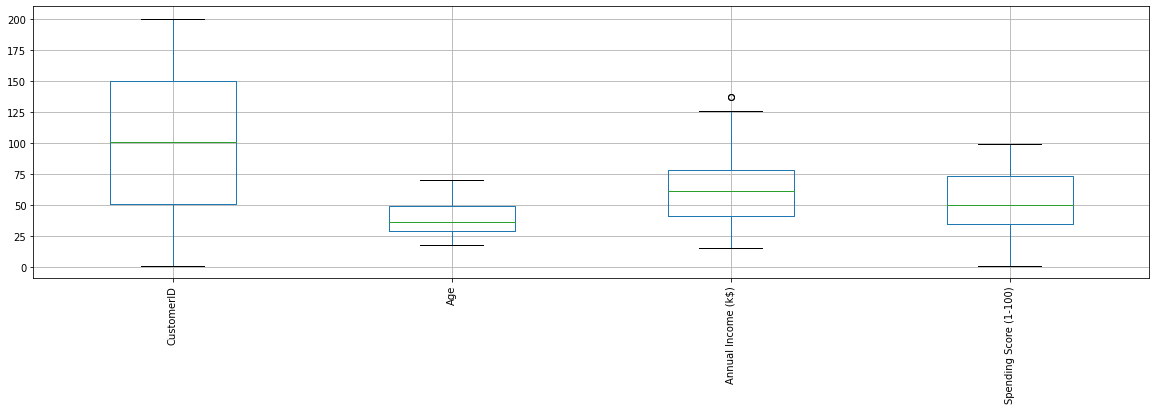

In [167]:
df.boxplot( rot = 90, figsize=(20,5))

Outlier in Annual income

In [168]:
Q3 = df['Annual Income (k$)'].quantile(0.99)
Q1 = df['Annual Income (k$)'].quantile(0.01)
df['Annual Income (k$)'][df['Annual Income (k$)']<=Q1]=Q1
df['Annual Income (k$)'][df['Annual Income (k$)']>=Q3]=Q3

After Replace outliers

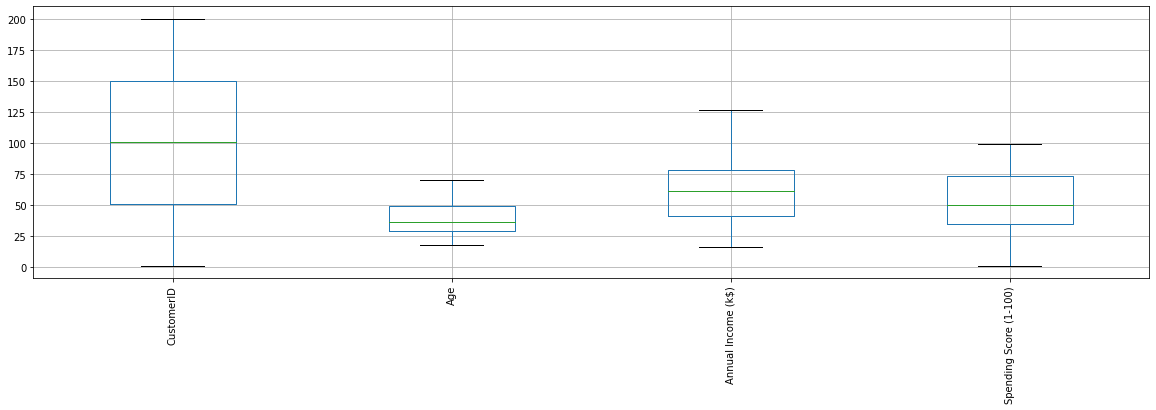

In [169]:
df.boxplot( rot = 90, figsize=(20,5))

**7. Check for Categorical columns and perform encoding.**

In [170]:
df.select_dtypes(include='object').columns

Index(['Gender'], dtype='object')

In [171]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [172]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [173]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.99,39
1,2,1,21,15.99,81
2,3,0,20,16.00,6
3,4,0,23,16.00,77
4,5,0,31,17.00,40


**8.Scaling the data**

In [174]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [175]:
x_scaled = pd.DataFrame(scale.fit_transform(df),columns= df.columns)
x_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.000091,0.051020
3,0.015075,0.0,0.096154,0.000091,0.775510
4,0.020101,0.0,0.250000,0.009172,0.397959


**9. Perform any of the clustering algorithms**

In [176]:
from sklearn.cluster import KMeans
error = []
k = list(range(2,9))

for i in k:
  kmeans = KMeans(n_clusters = i , init = 'k-means++')
  kmeans.fit(df)
  error.append(kmeans.inertia_)
error

[384779.8881911789,
 269473.1153651636,
 193406.99110584043,
 155204.95506817847,
 120710.62871825736,
 101521.18969349202,
 84610.91124267332]

Text(0, 0.5, 'error')

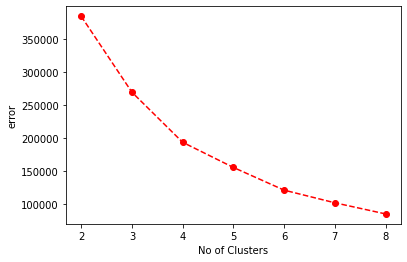

In [177]:
plt.plot(k,error, 'ro--')
plt.xlabel('No of Clusters')
plt.ylabel('error')

In [178]:
model = KMeans(n_clusters = 4)
model.fit(df)

KMeans(n_clusters=4)

In [179]:
mb=pd.Series(model.labels_)
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.99,39
1,2,1,21,15.99,81
2,3,0,20,16.00,6


**10. Add the cluster data with the primary dataset**

In [180]:
df['Cluster']=kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15.99,39,1
1,2,1,21,15.99,81,5
2,3,0,20,16.00,6,1
3,4,0,23,16.00,77,5
4,5,0,31,17.00,40,1


In [181]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,0,35,120.00,79,2
196,197,0,45,126.00,28,6
197,198,1,32,126.00,74,2
198,199,1,32,126.11,18,6
199,200,1,30,126.11,83,2


**11. Split the data into dependent and independent variables.**

In [182]:
X=df.drop('Cluster',axis=1)

In [183]:
y=df['Cluster']
y

0      1
1      5
2      1
3      5
4      1
      ..
195    2
196    6
197    2
198    6
199    2
Name: Cluster, Length: 200, dtype: int32

**12. Split the data into training and testing**

In [184]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [185]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 5)
(160,)
(40, 5)
(40,)


In [186]:
X_train

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,80,0,49,54.0,42
197,198,1,32,126.0,74
38,39,0,36,37.0,26
24,25,0,54,28.0,14
122,123,0,40,69.0,58
...,...,...,...,...,...
106,107,0,66,63.0,50
14,15,1,37,20.0,13
92,93,1,48,60.0,49
179,180,1,35,93.0,90


In [187]:
X_test

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
95,96,1,24,60.0,52
15,16,1,22,20.0,79
30,31,1,60,30.0,4
158,159,1,34,78.0,1
128,129,1,59,71.0,11
115,116,0,19,65.0,50
69,70,0,32,48.0,47
170,171,1,40,87.0,13
174,175,0,52,88.0,13
45,46,0,24,39.0,65


In [188]:
y_train

79     3
197    2
38     1
24     1
122    0
      ..
106    0
14     1
92     0
179    2
102    0
Name: Cluster, Length: 160, dtype: int32

In [189]:
y_test

95     0
15     5
30     1
158    4
128    4
115    0
69     3
170    6
174    6
45     5
66     3
182    6
165    7
78     3
186    6
177    2
56     3
152    4
82     3
68     3
124    4
16     1
148    4
93     0
65     3
60     3
84     0
67     3
125    7
132    4
9      5
18     1
55     3
75     3
150    4
104    0
135    7
137    7
164    6
76     3
Name: Cluster, dtype: int32

**13. Build the Model**

In [190]:
# model building
from sklearn.linear_model import LogisticRegression

In [191]:
log_reg=LogisticRegression()

In [192]:
#fit

log_reg.fit(X_train,y_train)

LogisticRegression()

**14. Train the Model**

In [193]:
y_pred = log_reg.predict(X_train)
y_pred

array([0, 2, 3, 1, 0, 2, 5, 5, 7, 3, 2, 7, 5, 4, 0, 3, 4, 0, 4, 0, 2, 0,
       5, 1, 5, 0, 1, 2, 3, 4, 3, 7, 6, 5, 0, 2, 1, 7, 0, 2, 1, 3, 3, 2,
       2, 0, 7, 1, 6, 3, 1, 7, 0, 5, 5, 6, 7, 1, 5, 0, 1, 1, 6, 7, 0, 6,
       1, 3, 0, 4, 4, 1, 6, 7, 3, 7, 3, 1, 7, 1, 1, 0, 7, 4, 5, 5, 6, 7,
       3, 5, 4, 3, 0, 4, 3, 6, 5, 0, 3, 7, 6, 4, 2, 3, 3, 1, 5, 0, 0, 0,
       4, 2, 0, 1, 5, 3, 2, 7, 5, 3, 2, 6, 7, 2, 3, 3, 0, 3, 6, 3, 3, 3,
       5, 3, 4, 6, 7, 5, 7, 2, 5, 3, 7, 4, 7, 0, 2, 0, 0, 3, 0, 2, 1, 6,
       3, 0, 1, 0, 2, 0], dtype=int32)

In [194]:
log_reg.score(X_train,y_train)

0.85625

**15. Test the Model**

In [195]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 5, 1, 4, 4, 2, 3, 4, 4, 5, 3, 4, 7, 0, 4, 2, 3, 4, 3, 3, 6, 1,
       4, 0, 3, 3, 0, 3, 7, 6, 5, 1, 3, 3, 4, 0, 7, 7, 4, 3], dtype=int32)

In [196]:
log_reg.score(X_test,y_test)

0.775

**16. Measure the performance using Evaluation Metrics.**

In [197]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [198]:
accuracy_score(y_test,y_pred)

0.775

In [199]:
y_pred1 = log_reg.predict(X_train)

accuracy_score(y_train,y_pred1)

0.85625

In [200]:
y_pred=log_reg.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 4,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 11,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  4]])

In [201]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5,6,7
Cluster,,,,,,,,
0,4,0,1,0,0,0,0,0
1,0,3,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,1,0,0,11,0,0,0,0
4,0,0,0,0,5,0,2,0
5,0,0,0,0,0,3,0,0
6,0,0,0,0,5,0,0,0
7,0,0,0,0,0,0,0,4


In [202]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         1
           3       1.00      0.92      0.96        12
           4       0.50      0.71      0.59         7
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         5
           7       1.00      1.00      1.00         4

    accuracy                           0.78        40
   macro avg       0.72      0.80      0.75        40
weighted avg       0.75      0.78      0.76        40

